In [1]:
# To - Do

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Data directory 
DATADIR = 'C:\\Users\\ASUS\\Downloads\\Datasets\\Kelas'

# Categories 
CATEGORIES = ['kosong', 'ramai']

# Resize the image to same dimension 100x100
IMG_SIZE = 100


In [2]:
# The training data list 
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except:
                pass

# Initializing the training data set 
create_training_data()
       

In [3]:
print(len(training_data))

300


In [4]:
import random

# Shuffling the training data to avoid bias due to sequencial learning 
random.shuffle(training_data)
random.shuffle(training_data)


In [5]:
x = [] # Features 
y = [] # Labels

In [6]:
for features, label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [7]:
import pickle

# Exporting the feature data for later use 
pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

# Exporting the label data for later use
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Importing the feature data
x = pickle.load(open("x.pickle", "rb"))

# Importing the label data
y = pickle.load(open("y.pickle", "rb"))

# Normalizing the data
x = x/255.0

In [9]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(x, y, batch_size=32, epochs=10, validation_split=0.1)



W0729 11:43:53.332442  9416 deprecation.py:506] From C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0729 11:43:53.941093  9416 deprecation.py:323] From C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 270 samples, validate on 30 samples
Epoch 1/10
270/270 [==============================] - 8s 31ms/sample - loss: 0.9743 - acc: 0.5741 - val_loss: 0.8116 - val_acc: 0.5333
Epoch 2/10
270/270 [==============================] - 7s 24ms/sample - loss: 0.6694 - acc: 0.5852 - val_loss: 0.6325 - val_acc: 0.6333
Epoch 3/10
270/270 [==============================] - 7s 24ms/sample - loss: 0.5949 - acc: 0.6963 - val_loss: 0.6351 - val_acc: 0.6667
Epoch 4/10
270/270 [==============================] - 7s 24ms/sample - loss: 0.4556 - acc: 0.8148 - val_loss: 0.5909 - val_acc: 0.7333
Epoch 5/10
270/270 [==============================] - 7s 24ms/sample - loss: 0.3270 - acc: 0.8667 - val_loss: 0.6110 - val_acc: 0.7000
Epoch 6/10
270/270 [==============================] - 6s 23ms/sample - loss: 0.2639 - acc: 0.8926 - val_loss: 0.5350 - val_acc: 0.8000
Epoch 7/10
270/270 [==============================] - 6s 23ms/sample - loss: 0.1976 - acc: 0.9370 - val_loss: 0.6844 - val_acc: 0.7333
Epoch 8/10

In [10]:
# # Setting up layers
# model = Sequential([
#     Flatten(input_shape=(100, 100)),
#     Dense(128, activation=tf.nn.relu),
#     Dense(10, activation=tf.nn.softmax)
# ])

# # Compiling the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model 
# model.fit(x, y, epochs=5)

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x, y)

print('Test accuracy:', test_acc)

scores = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

300/300 [==============================] - 1s 5ms/sample - loss: 0.0858 - acc: 0.9800
Test accuracy: 0.98
acc: 98.00%


In [12]:
# Function to prepare the image to be predicted 
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Function to predict the image 
def predict(filepath):
    prediction = model.predict([prepare(filepath)])
    print(CATEGORIES[int(prediction[0][0])])
    

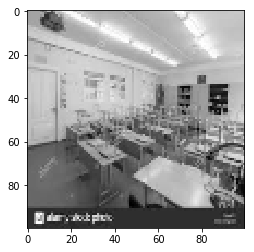

kosong


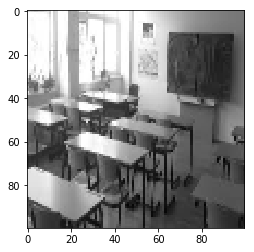

kosong


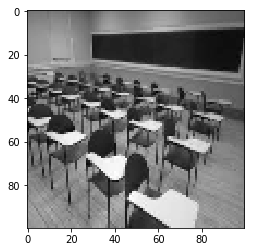

kosong


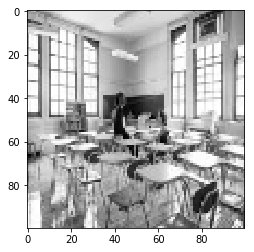

kosong


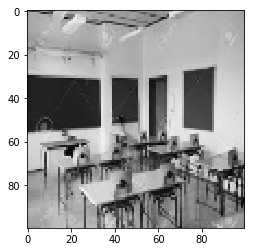

ramai


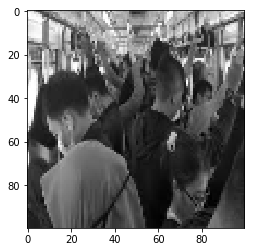

ramai


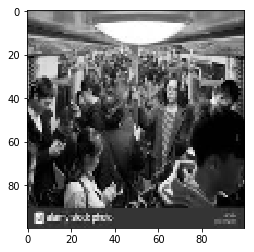

ramai


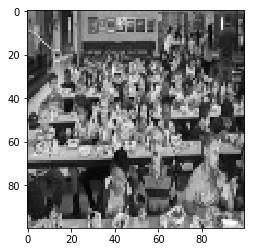

ramai


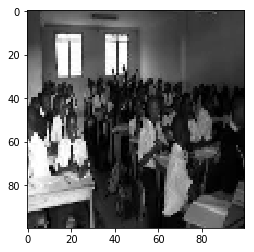

ramai


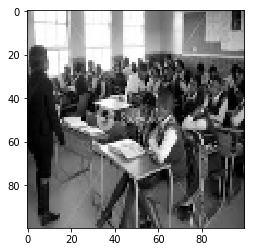

ramai


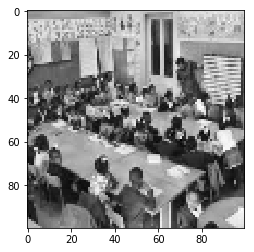

ramai


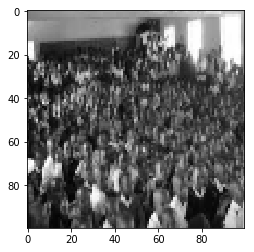

ramai


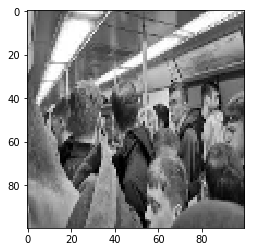

ramai


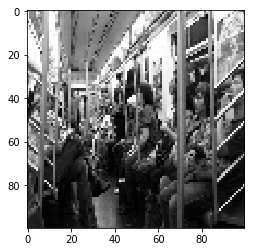

ramai


In [13]:
# Directory where the images to be predicted are stored
filepath = "C:\\Users\\ASUS\\Downloads\\Testing"

for img in os.listdir(filepath): 
    path = os.path.join(filepath, img)
    img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap="gray")
    plt.show()
    predict(path)
